### Лабораторна робота №2: "Імплементація алгоритмів стиснення"

#### Корець Христина і Кирилова Ірина

### Алгоритм Гаффмана

In [51]:
import time
import matplotlib.pyplot as plt

#### Клас Huffman реалізує алгоритм стиснення даних методом Хаффмана, який ґрунтується на побудові оптимального префіксного коду для символів вихідного тексту з урахуванням їх відносних частот зустрічання. Основними етапами алгоритму є: зчитування файлу методом readfile, обчислення частот символів у тексті та їх нормалізація за допомогою методу find_frequency, побудова дерева Хаффмана за допомогою методу build_tree, який об'єднує найменші вузли до утворення кореневого вузла, створення бінарних кодів для символів за допомогою рекурсивного обходу дерева у методі huffman_codes, кодування тексту за отриманими кодами методом encode, та декодування закодованого тексту методом decode. Головна ідея алгоритму полягає у тому, що символи з меншими частотами отримують коротші бінарні коди, що дозволяє ефективно стиснути дані, зокрема в тих випадках, коли деякі символи зустрічаються частіше за інші.

In [2]:

import heapq
class Node:
    """
    Node class.
    """
    def __init__(self, char = None, freq = 0, left = None, right = None):
        self.left = left
        self.right = right
        self.char = char
        self.freq = freq

    def __lt__(self, other):
        return self.freq < other.freq

    def __repr__(self):
        return f'Node(char={self.char}, freq={self.freq}, left = {self.left}, right = {self.right})'

class Huffman:
    """
    Huffman code class.
    """
    def __init__(self, filename):
        self.filename = filename
        self.encoded = ''

    def readfile(self):
        """
        Read file.
        """
        with open(self.filename, 'r', encoding = 'UTF-8') as f:
            text = f.read()
        return text

    def find_frequency(self, text):
        """
        Char frequency.
        """
        frequency = {i: 0 for i in text}
        for i in text:
            frequency[i] += 1
        for key, value in frequency.items():
            frequency[key] = value/len(text)
        return dict(reversed(sorted(frequency.items(), key = lambda x: x[1])))

    def build_tree(self, frequency_dict):
        """
        Tree.
        """
        priority_queue = [Node(char=char, freq=freq) for char, freq in frequency_dict.items()]
        heapq.heapify(priority_queue)
        while len(priority_queue) > 1:
            left = heapq.heappop(priority_queue)
            right = heapq.heappop(priority_queue)
            merged_node = Node(freq=left.freq + right.freq, left=left, right=right)
            heapq.heappush(priority_queue, merged_node)
        return priority_queue[0]

    def huffman_codes(self, node, current_code, codes):
        """
        Making huffman code.
        """
        if node is not None:
            if node.char is not None:
                codes[node.char] = current_code
            self.huffman_codes(node.left, current_code + "0", codes)
            self.huffman_codes(node.right, current_code + "1", codes)

    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        """
        Encoding.
        """
        frequency_dict = self.find_frequency(text)
        root = self.build_tree(frequency_dict)
        codes = {}
        self.huffman_codes(root, "", codes)
        encoded_data = ''.join(codes[char] for char in text)
        with open(self.filename, 'w', encoding = 'UTF-8') as f:
            f.write(encoded_data)
        return encoded_data

    def decode(self, code: str, coding_dict: dict[str, str]):
        """
        Decoding.
        """
        decoded_data = ""
        current_code = ""
        reverse_codes = {code: char for char, code in coding_dict.items()}
        for bit in code:
            current_code += bit
            if current_code in reverse_codes:
                decoded_data += reverse_codes[current_code]
                current_code = ""
        with open(self.filename, 'w', encoding = 'UTF-8') as f:
            f.write(decoded_data)
        return decoded_data

In [105]:
file_2 = "HelloHuffman!"
frequency_2 = gg.find_frequency(file_2)
encoded_2 = gg.encode(file_2)
decoded_2 = gg.decode(encoded_2, {'l': '00', 'u': '010', 'H': '011', 'f': '100', '!': '1010', 'o': '1011', 'm': '1100', 'a': '1101', 'e': '1110', 'n': '1111'})
print(f"Encode: {encoded_2}")
print(f"Decode: {decoded_2}")

Encode: 0111110000010110110101001001100110111111010
Decode: HelloHuffman!


In [111]:
text = "In the heart of the bustling city, where the rhythmic symphony of footsteps and honking horns creates a lively melody, there exists a hidden oasis of tranquility. Tucked away from the chaos, a quaint park welcomes weary souls with open arms. Lush greenery, adorned with vibrant blossoms, provides a visual feast for those seeking refuge from the concrete jungle. The gentle rustling of leaves and the distant hum of the city form a harmonious duet, inviting contemplation and introspection. A meandering pathway, paved with cobblestones, guides visitors through this sanctuary of serenity. Benches, strategically placed beneath the shade of ancient trees, offer a quiet space for reflection and connection with nature. It's a haven where the relentless pace of urban life takes a backseat to the unhurried dance of sunlight filtering through leaves. As the day unfolds, the park transforms. Morning joggers set the tone for an energetic start, while noon witnesses picnics and laughter. In the afternoon, artists find inspiration in the play of light and shadow, creating a"
start_encode = time.time()
encoded_text = gg.encode(text)
end_encode = time.time()
encode_time = end_encode - start_encode

start_decode = time.time()
decoded_text = gg.decode(encoded_text,  {'e': '000', 'd': '00100', 'w': '001010', "'": '001011000', 'T': '001011001', 'j': '001011010', 'A': '001011011', 'k': '0010111', 'r': '0011', 'c': '01000', ',': '010010', 'm': '010011', 'f': '01010', 'l': '01011', 'i': '0110', 'o': '0111', 's': '1000', 'a': '1001', 'p': '101000', 'b': '1010010', '.': '1010011', 'y': '101010', 'v': '1010110', 'M': '1010111000', 'x': '1010111001', 'L': '1010111010', 'B': '1010111011', 'I': '101011110', 'q': '101011111', 'n': '1011', ' ': '110', 't': '1110', 'g': '111100', 'u': '111101', 'h': '11111'})
end_decode = time.time()
decode_time = end_decode - start_decode

print("Encode Time:", encode_time)
print("Decode Time:", decode_time)

Encode Time: 0.0020225048065185547
Decode Time: 0.001973390579223633


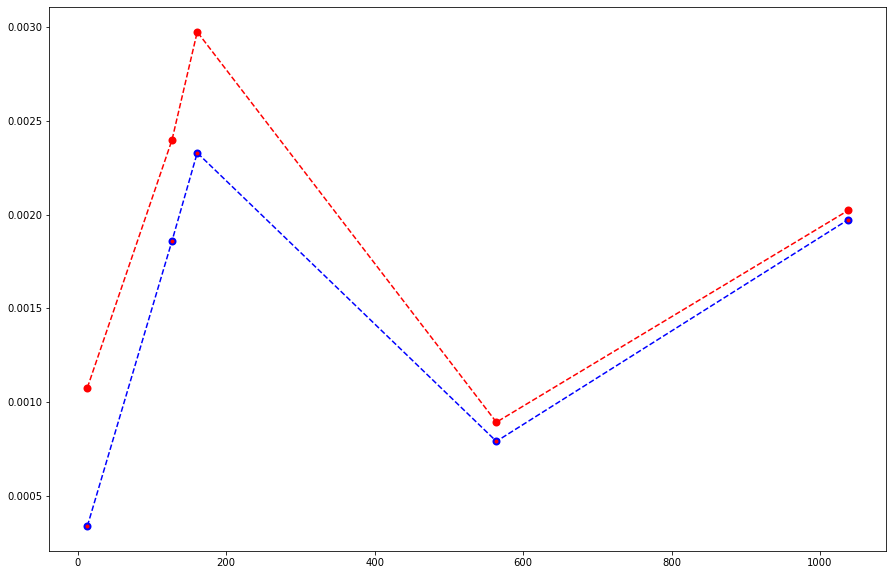

In [112]:
x = [13, 127, 161, 564, 1038]
y = [0.0010776519775390625, 0.0023980140686035156, 0.0029735565185546875, 0.0008935928344726562, 0.0020225048065185547]
z = [0.0003399848937988281, 0.0018596649169921875, 0.002329111099243164, 0.0007915496826171875, 0.001973390579223633]
plt.figure(figsize=(15, 10))
plt.plot(x, y, color='red', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.plot(x, z, color='blue', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.show()

#### З графіка помітно, що алгоритм достатньо непердбачуваний, вірогідно результат залежить від кількості патернів і повторювання елементів. Декодування працює швидше ніж кодування. 

In [ ]:
def compression_ratio(original_text, compressed_text):
    original_length = len(original_text)
    compressed_length = len(compressed_text)
    ratio = (original_length - compressed_length) / original_length * 100
    return ratio

In [113]:
text = "Hello, World!"
text1 = "Holdin' me back \
    Gravity's holdin' me back\
    I want you to hold out the palm of your hand\
    Why don't we leave it at that?"
text2 = "thank you, said Professor McGonagall coldly, as though\
 she didnt think this was the moment for sherbet lemons. As I say,\
 even if You-Know-Who has gone\
 M y dear Professor, surely a sensible person like yourself can\
 call him by his name? All this You-Know-Who nonsense for\
 eleven years I have been trying to persuade people to call him by\
 his proper name: Voldemort. Professor McGonagall flinched, but\
 Dumbledore, who was unsticking two sherbet lemons, seemed\
 not to notice. It all gets so confusing if we keep saying YouKnow-Who. I have never seen any reason to be frightened of\
 saying Voldemorts name.\
 I know you havent, said Professor McGonagall, sounding halfexasperated, half-admiring. But youre different. Everyone knows\
 youre the only one You-Know oh, all right, Voldemort was\
 frightened of.\
 You flatter me, said Dumbledore calmly. Voldemort had\
 powers I will never have.\
 Only because youre too well noble to use them.\
 Its lucky its dark. I havent blushed so much since Madam\
 Pomfrey told me she liked my new earmuffs."
print(compression_ratio(text, gg.encode(text)))
print(compression_ratio(text1, gg.encode(text1)))
print(compression_ratio(text2, gg.encode(text2)))

-223.0769230769231
-306.2992125984252
-350.34213098729225


### Алгоритм LZW


##### Ініціалізація словника: На початку стиснення створюється словник, який містить всі можливі однобуквенні символи, наприклад, ASCII символи. Кожному символу призначається унікальний код.
##### Кодування тексту: Починаючи з початку тексту, алгоритм шукає найдовший префіксний рядок, який вже є в словнику. Цей рядок відображається у вихідному потоці як його відповідний код. Якщо поточний рядок, який розглядається, не знайдено в словнику, він додається до словника, а його відповідний код виводиться у вихідний потік. Потім починається обробка наступного символу, що складається з попереднього рядка та наступного символу тексту.
##### Декодування коду: Під час декодування коду алгоритм використовує структуру словника, щоб відновити початковий текст. Він отримує послідовність кодів та починає розглядати кожен код. Він знаходить відповідний символ у словнику та виводить його. Якщо наступний код не знайдено в словнику, алгоритм використовує останній виведений рядок та додає до нього перший символ цього рядка.

In [40]:
class LZW:
    def __init__(self, filename):
        self.filename = filename

    def read_file(self):
        with open(self.filename, 'r', encoding = 'UTF-8') as f:
            text = f.read()
        return text

    def encode(self, text: str) -> list:
        size = 256
        dictionary = {chr(i): i for i in range(size)}
        current = ''
        result = []
        for i in text:
            test_str = current + i
            if test_str in dictionary:
                current = test_str
            else:
                result.append(str(dictionary[current]))
                dictionary[test_str] = size
                size += 1
                current = i
        result.append(str(dictionary[current]))
        with open(self.filename, 'w', encoding = 'UTF-8') as f:
            file_result = [str(i) for i in result]
            f.write(' '.join(file_result))
        return " ".join(result)

    def decode(self, code: str) -> str:
        result = []
        size = 256
        dictionary = {i: chr(i) for i in range(size)}
        codes = list(map(int, code.split(' ')))
        current_code = codes.pop(0)
        result.append(dictionary[current_code])
        for code in codes:
            if code in dictionary:
                entry = dictionary[code]
            else:
                entry = dictionary[current_code] + dictionary[current_code][0]
            result.append(entry)
            dictionary[size] = dictionary[current_code] + entry[0]
            size += 1
            current_code = code
        with open(self.filename, 'w', encoding = 'UTF-8') as f:
            f.write(''.join(result))
        return ''.join(result)

In [42]:
lzw = LZW("test.txt")
compressed = lzw.encode('Hello, World!')
decompressed = lzw.decode(compressed)
print(f"Encode: {compressed}")
print(f"Decode: {decompressed}")

Encode: 72 101 108 108 111 44 32 87 111 114 108 100 33
Decode: Hello, World!


In [87]:
text = "thank you, said Professor McGonagall coldly, as though\
 she didnt think this was the moment for sherbet lemons. As I say,\
 even if You-Know-Who has gone\
 M y dear Professor, surely a sensible person like yourself can\
 call him by his name? All this You-Know-Who nonsense for\
 eleven years I have been trying to persuade people to call him by\
 his proper name: Voldemort. Professor McGonagall flinched, but\
 Dumbledore, who was unsticking two sherbet lemons, seemed\
 not to notice. It all gets so confusing if we keep saying You-Know-Who. I have never seen any reason"
start_encode = time.time()
encoded_text = lzw.encode(text)
end_encode = time.time()
encode_time = end_encode - start_encode

start_decode = time.time()
decoded_text = lzw.decode(encoded_text)
end_decode = time.time()
decode_time = end_decode - start_decode

print("Encode Time:", encode_time)
print("Decode Time:", decode_time)

Encode Time: 0.0036449432373046875
Decode Time: 0.0030477046966552734


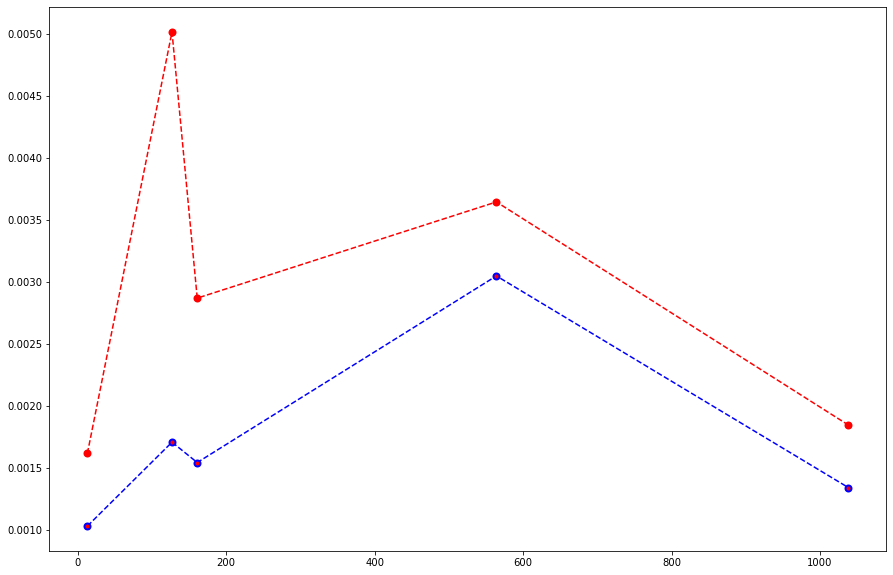

In [88]:
x = [13, 127, 161, 564, 1038]
y = [0.0016148090362548828, 0.005017280578613281, 0.0028684139251708984, 0.0036449432373046875, 0.0018444061279296875]
z = [0.001028299331665039, 0.0017056465148925781, 0.0015413761138916016, 0.0030477046966552734, 0.0013396739959716797]
plt.figure(figsize=(15, 10))
plt.plot(x, y, color='red', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.plot(x, z, color='blue', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.show()

#### З графіка можна помітити, що алгоритм LZW є дуже непередбачуваним і на пряму залежить від кількості патернів і вмісту тексту, до прикладу текст який містить 127 символів опрацьовувася вдвічі довше ніж текст з 1038-ма символами. Декодування займає менше часу ніж кодування. 

### Ступінь стиснення

In [96]:
def compression_ratio(original_text, compressed_text):
    original_length = len(original_text)
    compressed_length = len(compressed_text.split(" "))
    ratio = (original_length - compressed_length) / original_length * 100
    return ratio

In [99]:
text = "Hello, World!"
text1 = "Holdin' me back \
    Gravity's holdin' me back\
    I want you to hold out the palm of your hand\
    Why don't we leave it at that?"
text2 = "thank you, said Professor McGonagall coldly, as though\
 she didnt think this was the moment for sherbet lemons. As I say,\
 even if You-Know-Who has gone\
 M y dear Professor, surely a sensible person like yourself can\
 call him by his name? All this You-Know-Who nonsense for\
 eleven years I have been trying to persuade people to call him by\
 his proper name: Voldemort. Professor McGonagall flinched, but\
 Dumbledore, who was unsticking two sherbet lemons, seemed\
 not to notice. It all gets so confusing if we keep saying YouKnow-Who. I have never seen any reason to be frightened of\
 saying Voldemorts name.\
 I know you havent, said Professor McGonagall, sounding halfexasperated, half-admiring. But youre different. Everyone knows\
 youre the only one You-Know oh, all right, Voldemort was\
 frightened of.\
 You flatter me, said Dumbledore calmly. Voldemort had\
 powers I will never have.\
 Only because youre too well noble to use them.\
 Its lucky its dark. I havent blushed so much since Madam\
 Pomfrey told me she liked my new earmuffs."
print(compression_ratio(text, lzw.encode(text)))
print(compression_ratio(text1, lzw.encode(text1)))
print(compression_ratio(text2, lzw.encode(text2)))


0.0
26.77165354330709
43.988269794721404


#### Алгоритм краще стискає текст з більшою кількістю повторень і патернів, також розмір впливає на результат

### Алгоритм LZ77

##### Клас LZ77 реалізує алгоритм стиснення даних LZ77 (Lempel-Ziv 1977), який використовує принцип слайдінгового вікна та зміщення для кодування повторюючихся фрагментів тексту. Під час кодування, текст розбивається на фрагменти, кожен з яких містить префікс - фрагмент, який вже був знайдений у попередній частині тексту, і символ, який не збігається з попереднім текстом. Цей фрагмент представлений як (зміщення, довжина) пара, де зміщення вказує на позицію в попередньому тексті, а довжина - на кількість символів, що повторюються в поточному тексті. Метод encode здійснює цей процес, формуючи послідовність токенів для вхідного тексту. Під час декодування, метод decode відновлює вихідний текст, використовуючи інформацію про зміщення та довжину, щоб відновити повторюючіся фрагменти. Цей алгоритм ефективно використовується для стиснення даних, особливо в текстових форматах, де є багато повторюючихся фрагментів.

In [14]:
class LZ77:
    '''LZ77 Class Implementation'''
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size

    def encode(self, text: str) -> list[tuple[int, int, str]]:
        '''Encoding information'''
        def find_encoding_token(text: str, search_buffer: str) -> tuple[int, int, str]:
            length, offset = 0, 0
            if not search_buffer:
                return offset, length, text[length]

            for i, character in enumerate(search_buffer):
                found_offset = len(search_buffer) - i
                if character == text[0]:
                    found_length = match_length_from_index(text, search_buffer, 0, i)
                    if found_length >= length:
                        offset, length = found_offset, found_length

            return offset, length, text[length]

        def match_length_from_index(
            text: str, window: str, text_index: int, window_index: int
        ) -> int:
            if not text or text[text_index] != window[window_index]:
                return 0
            return 1 + match_length_from_index(
                text, window + text[text_index], text_index + 1, window_index + 1
            )

        output = []
        search_buffer = ""

        while text:
            token = find_encoding_token(text, search_buffer)
            output.append((token[0], token[1], token[2]))
            search_buffer += text[: token[1] + 1]
            if len(search_buffer) > self.buffer_size:
                search_buffer = search_buffer[-self.buffer_size :]
            text = text[token[1] + 1 :]

        return output


    def decode(self, code: str) -> str:
        '''Decoding'''
        output = ""
        for offset, length, char in code:
            for _ in range(length):
                output += output[-offset]
            output += char

        return output

In [49]:

lz77 = LZ77(buffer_size=5)
text = "Hello, World!"
encoded_text = lz77.encode(text)
decoded_text = lz77.decode(encoded_text)

print("Encoded:", encoded_text)
print("Decoded:", decoded_text)


Encoded: [(0, 0, 'H'), (0, 0, 'e'), (0, 0, 'l'), (1, 1, 'o'), (0, 0, ','), (0, 0, ' '), (0, 0, 'W'), (4, 1, 'r'), (0, 0, 'l'), (0, 0, 'd'), (0, 0, '!')]
Decoded: Hello, World!


In [70]:
text = "‘No, thank you,’ said Professor McGonagall coldly, as though\
 she didn’t think this was the moment for sherbet lemons. ‘As I say,\
 even if You-Know-Who has gone –’"
start_encode = time.time()
encoded_text = lz77.encode(text)
end_encode = time.time()
encode_time = end_encode - start_encode

start_decode = time.time()
decoded_text = lz77.decode(encoded_text)
end_decode = time.time()
decode_time = end_decode - start_decode

print("Encode Time:", encode_time)
print("Decode Time:", decode_time)

Encode Time: 0.001390695571899414
Decode Time: 0.0003437995910644531


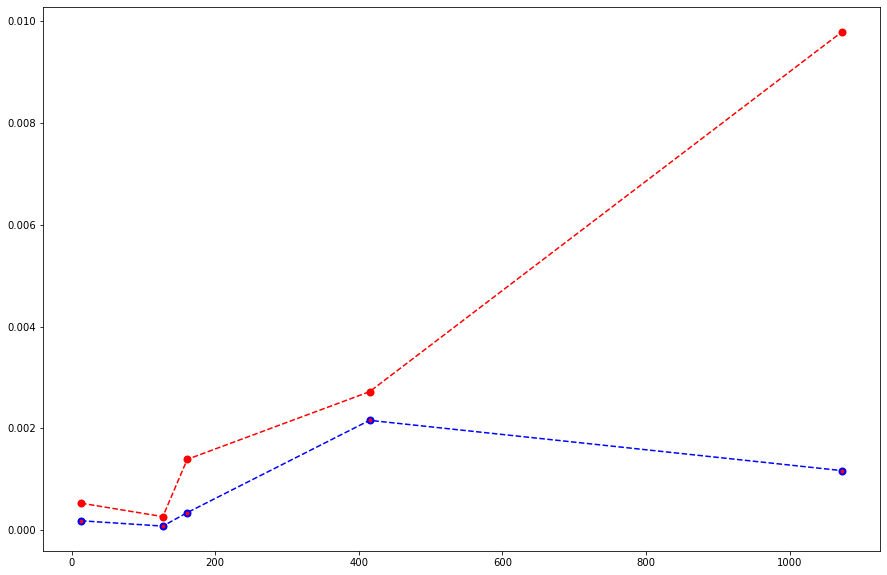

In [80]:
x = [13, 127, 161, 415, 1073]
y = [0.0005295276641845703, 0.0002651214599609375, 0.001390695571899414, 0.0027208328247070312, 0.009793996810913086] #my algorithm
z = [0.00018334388732910156, 7.891654968261719e-05, 0.0003437995910644531, 0.002157926559448242, 0.001169443130493164]
plt.figure(figsize=(15, 10))
plt.plot(x, y, color='red', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.plot(x, z, color='blue', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.show()

#### З графіка можемо помітити, що процес кодування(червоний графік) займає більше часу ніж декодування(синій графік), також варто вказати, що при створенні цього графіка в одному з кейсів, а саме при кодуванні цитати 
    "Holdin' me back 
    Gravity's holdin' me back
    I want you to hold out the palm of your hand
    Why don't we leave it at that?"
#### Час витрачений на декодування різко впав в порівнянні з минулим прикладом, та при подільшому порівнянні ми дійшли висновк,що це вийняток, адже потім графік став рівномірним.

### Ступінь стиснення

In [101]:
def compression_ratio(original_text, compressed_text):
    original_length = len(original_text)
    compressed_length = len(compressed_text)
    ratio = (original_length - compressed_length) / original_length * 100
    return ratio

In [102]:
text = "Hello, World!"
text1 = "Holdin' me back \
    Gravity's holdin' me back\
    I want you to hold out the palm of your hand\
    Why don't we leave it at that?"
text2 = "thank you, said Professor McGonagall coldly, as though\
 she didnt think this was the moment for sherbet lemons. As I say,\
 even if You-Know-Who has gone\
 M y dear Professor, surely a sensible person like yourself can\
 call him by his name? All this You-Know-Who nonsense for\
 eleven years I have been trying to persuade people to call him by\
 his proper name: Voldemort. Professor McGonagall flinched, but\
 Dumbledore, who was unsticking two sherbet lemons, seemed\
 not to notice. It all gets so confusing if we keep saying YouKnow-Who. I have never seen any reason to be frightened of\
 saying Voldemorts name.\
 I know you havent, said Professor McGonagall, sounding halfexasperated, half-admiring. But youre different. Everyone knows\
 youre the only one You-Know oh, all right, Voldemort was\
 frightened of.\
 You flatter me, said Dumbledore calmly. Voldemort had\
 powers I will never have.\
 Only because youre too well noble to use them.\
 Its lucky its dark. I havent blushed so much since Madam\
 Pomfrey told me she liked my new earmuffs."
print(compression_ratio(text, lz77.encode(text)))
print(compression_ratio(text1, lz77.encode(text1)))
print(compression_ratio(text2, lz77.encode(text2)))

15.384615384615385
25.984251968503933
19.843597262952102


#### Алгоритм LZ77 достатньо вдало стискає текст, та результат також залежить від вмісту тексту і кількості патернів, що важливо відмітити, текст, який має найкращий результат у LZW у алгоритмі LZ77 стиснуто гірше ніж інші.

### Deflate

In [116]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size

    def encode(self, text: str) -> str:
        lz77 = LZ77(self.buffer_size)
        huffman = Huffman("txt.txt")
        lz77_enc = lz77.encode(text)
        frequencies = {}
        for tpl in lz77_enc:
            if tpl[2] in frequencies:
                frequencies[tpl[2]] += 1
            else:
                frequencies[tpl[2]] = 1
        root = huffman.build_tree(frequencies)
        codes = {}
        huffman.huffman_codes(root, "", codes)
        encoded_data = ''.join(codes[char] for char in text if char in codes)
        return encoded_data

    def decode(self, code: str) -> str:
        pass


In [117]:
line = "Hello, World!"
deflate = Deflate(10)
print(deflate.encode(line))

1100110101101110000010101010011100110011111
